In [10]:
import pandas as pd
import numpy as np

# 1. Предобработка данных для модели

In [11]:
# загрузка сырых данных
train_raw = pd.read_csv('./features.csv', index_col = 'match_id')
test = pd.read_csv('./features_test.csv', index_col = 'match_id')

In [12]:
# для начала необходимо удалить признаки связанные с исходом матча из train_raw
train_raw.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'],
               axis = 1,
               inplace = True)

train_raw = train_raw.fillna(0)

In [13]:
# разделим тренировочный датасет на тренировочные данные и ответы
X = train_raw
y = train_raw['radiant_win'].to_frame()
X.drop(['radiant_win'], axis=1, inplace=True)

# 2. Попробуем градиентный бустинг

In [14]:
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [15]:
# определим фолды
kf = KFold(y.size, n_folds = 5, shuffle = True, random_state = 100)

In [16]:
gb_scores = []
num_trees = [10, 20, 30, 40, 50, 70, 100, 120, 150, 200, 250, 300, 400, 500]
for n in num_trees:
    print('Trying ', n)
    model = GradientBoostingClassifier(n_estimators=n, random_state=100)
    start_t = datetime.datetime.now()
    scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time: ', datetime.datetime.now() - start_t)
    print(scores)
    gb_scores.append(np.mean(scores))
    

Trying  10
Time:  0:00:23.674435
[ 0.66165034  0.66480756  0.6675309   0.6610796   0.66778999]
Trying  20
Time:  0:00:31.302977
[ 0.68208814  0.6812496   0.68436094  0.67760577  0.68558318]
Trying  30
Time:  0:00:36.669124
[ 0.68961544  0.68761653  0.6917235   0.68538975  0.69276825]
Trying  40
Time:  0:00:43.634382
[ 0.69439493  0.69207347  0.6968409   0.68971842  0.69796541]
Trying  50
Time:  0:00:50.834899
[ 0.69764     0.69569809  0.69987237  0.69304983  0.70124807]
Trying  70
Time:  0:01:05.379905
[ 0.70227335  0.70118056  0.70435184  0.69785743  0.7061842 ]
Trying  100
Time:  0:01:28.914845
[ 0.70670196  0.70617433  0.70911064  0.70218747  0.71042098]
Trying  120
Time:  0:01:40.993643
[ 0.70842565  0.70789248  0.71087061  0.70410996  0.71201757]
Trying  150
Time:  0:02:02.709770
[ 0.71060788  0.7102596   0.71295173  0.70641361  0.71448623]
Trying  200
Time:  0:02:41.118411
[ 0.71342365  0.71319954  0.71570881  0.70969753  0.71739584]
Trying  250
Time:  0:03:15.505167
[ 0.71536857

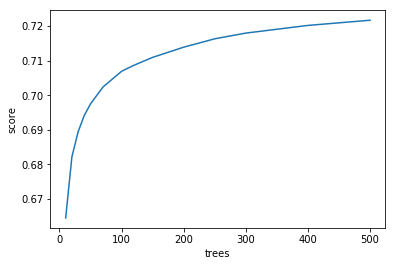

In [17]:
# Построим график roc_auc
plt.plot(num_trees, gb_scores)
plt.xlabel('trees')
plt.ylabel('score')
plt.show()

# Выводы
* Кросс-валидация на 30 деревьях заняла 36сек и дала ROC-AUC score ~ 0.69
<br>
* 70-100 решающих деревьев представляется оптимальным. 
<br>
* Возможно увеличение числа деревьев, что несколько повышает качество до ~0.71-0.72
<br>
* При увеличении числа деревьев, возможно стоит попробовать использовать урезанную выборку для обучения. Возможно имеет смысл ограничить глубину дерева. Эти меры могут привести к уменьшению времени обучения при некотором росте качества модели